In [ ]:
import pandas as pd
import numpy as np

import librosa
import librosa.display
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
import sys

# to play the audio files
from IPython.display import Audio


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
Crema = "/content/drive/MyDrive/DB/AudioWAV/"
Savee = "/content/drive/MyDrive/DB/ALL/"
Ravdess = "/content/drive/MyDrive/DB/audio_speech_actors_01-24/audio_speech_actors_01-24/"
Tess = "/content/drive/MyDrive/DB/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"



In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df

Emotions                                               Path
0        happy  /content/drive/MyDrive/DB/audio_speech_actors_...
1         fear  /content/drive/MyDrive/DB/audio_speech_actors_...
2         calm  /content/drive/MyDrive/DB/audio_speech_actors_...
3        happy  /content/drive/MyDrive/DB/audio_speech_actors_...
4         calm  /content/drive/MyDrive/DB/audio_speech_actors_...
...        ...                                                ...
1435  surprise  /content/drive/MyDrive/DB/audio_speech_actors_...
1436  surprise  /content/drive/MyDrive/DB/audio_speech_actors_...
1437      fear  /content/drive/MyDrive/DB/audio_speech_actors_...
1438  surprise  /content/drive/MyDrive/DB/audio_speech_actors_...
1439   disgust  /content/drive/MyDrive/DB/audio_speech_actors_...

[1440 rows x 2 columns]

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/DB/AudioWAV/1079_WSI_AN...
1  neutral  /content/drive/MyDrive/DB/AudioWAV/1079_WSI_NE...
2    happy  /content/drive/MyDrive/DB/AudioWAV/1079_WSI_HA...
3     fear  /content/drive/MyDrive/DB/AudioWAV/1079_WSI_FE...
4     fear  /content/drive/MyDrive/DB/AudioWAV/1079_TSI_FE...

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                      Path
0    angry  /content/drive/MyDrive/DB/ALL/DC_a01.wav
1    angry  /content/drive/MyDrive/DB/ALL/DC_a12.wav
2    angry  /content/drive/MyDrive/DB/ALL/DC_a08.wav
3    angry  /content/drive/MyDrive/DB/ALL/DC_a03.wav
4    angry  /content/drive/MyDrive/DB/ALL/DC_a13.wav

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0      sad  /content/drive/MyDrive/DB/TESS Toronto emotion...
1      sad  /content/drive/MyDrive/DB/TESS Toronto emotion...
2      sad  /content/drive/MyDrive/DB/TESS Toronto emotion...
3      sad  /content/drive/MyDrive/DB/TESS Toronto emotion...
4      sad  /content/drive/MyDrive/DB/TESS Toronto emotion...

In [ ]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path

Emotions                                               Path
0       happy  /content/drive/MyDrive/DB/audio_speech_actors_...
1        fear  /content/drive/MyDrive/DB/audio_speech_actors_...
2        calm  /content/drive/MyDrive/DB/audio_speech_actors_...
3       happy  /content/drive/MyDrive/DB/audio_speech_actors_...
4        calm  /content/drive/MyDrive/DB/audio_speech_actors_...
..        ...                                                ...
475       sad          /content/drive/MyDrive/DB/ALL/KL_sa12.wav
476   neutral           /content/drive/MyDrive/DB/ALL/KL_n01.wav
477  surprise          /content/drive/MyDrive/DB/ALL/KL_su05.wav
478       sad          /content/drive/MyDrive/DB/ALL/KL_sa08.wav
479   neutral           /content/drive/MyDrive/DB/ALL/KL_n28.wav

[12162 rows x 2 columns]

Data Visualization and exploration


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


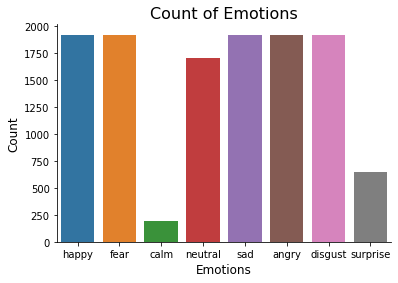

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

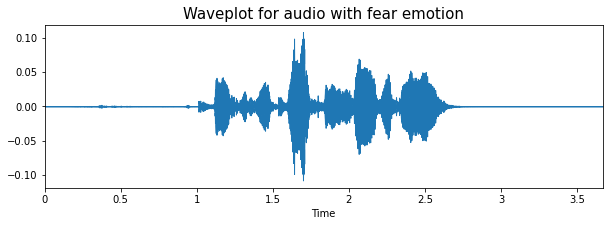

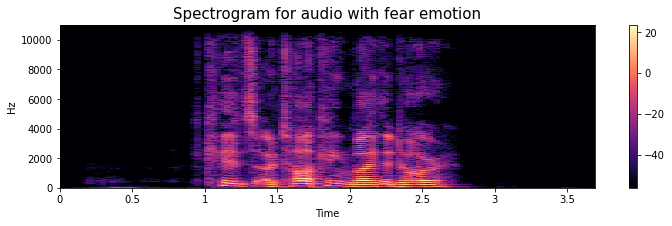

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

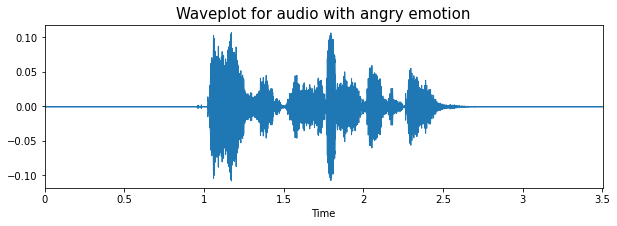

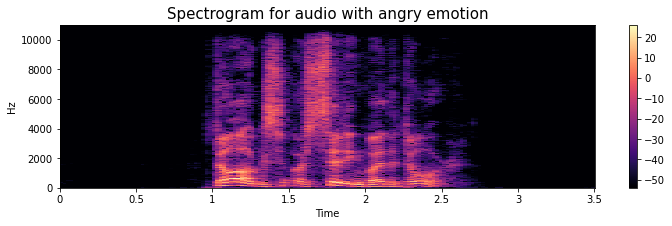

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

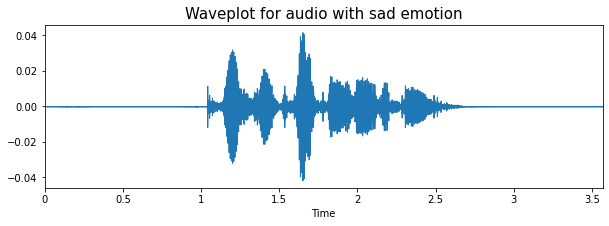

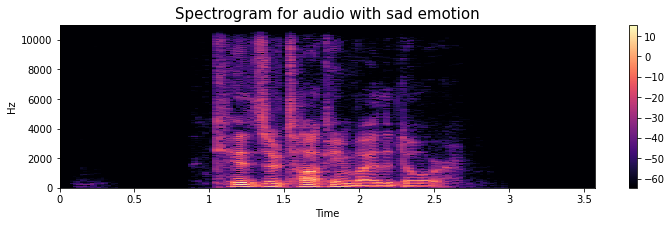

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

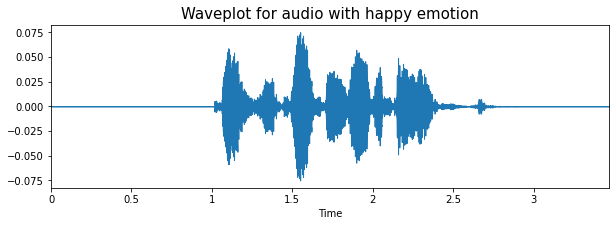

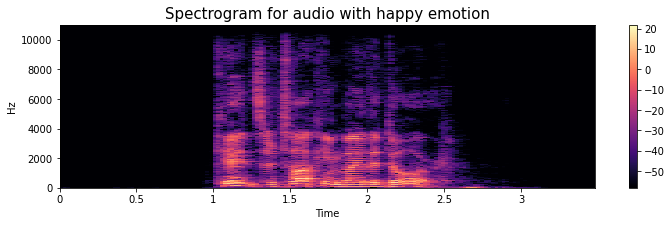

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

Data Augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

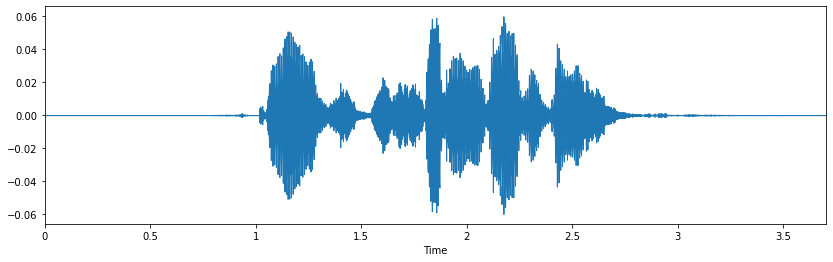

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)


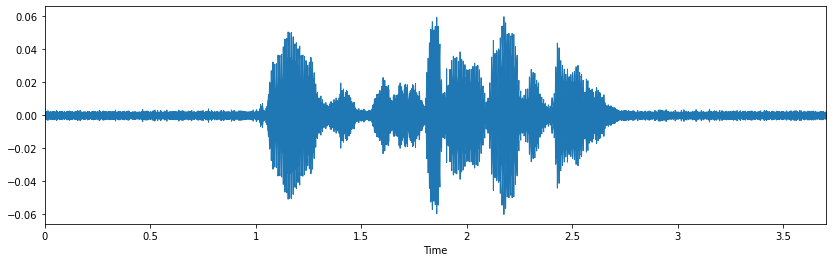

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

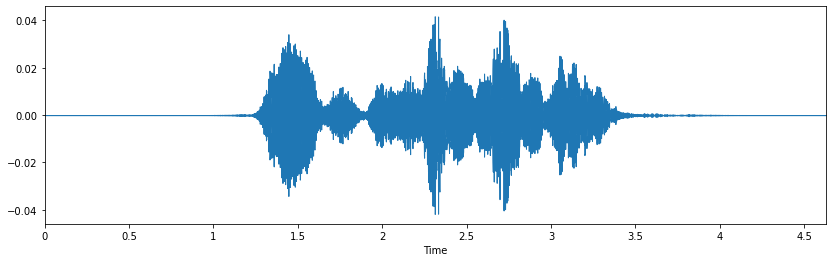

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

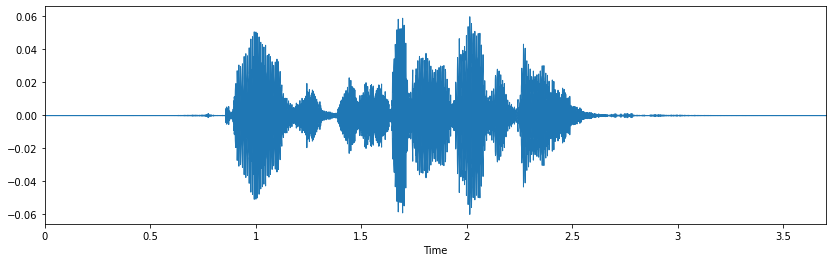

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

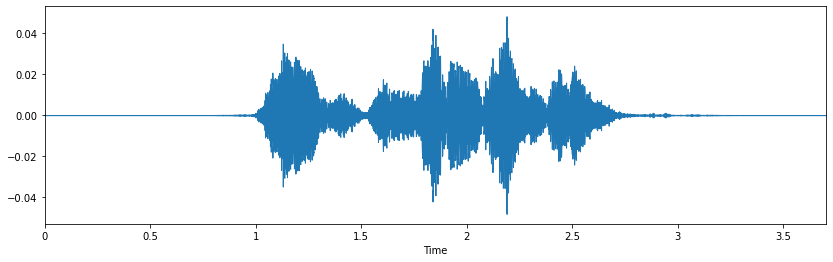

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint


In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

KeyboardInterrupt: ignored

In [ ]:
len(X), len(Y), data_path.Path.shape

(588, 588, (12162,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features

0    labels
0    0.233389     happy
1    0.165545      fear
2    0.232661      calm
3    0.169999     happy
4    0.180714      calm
..        ...       ...
583  0.128346      fear
584  0.181636  surprise
585  0.117590  surprise
586  0.114959   disgust
587  0.086548  surprise

[588 rows x 2 columns]

Data Preparation

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=9, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((441, 1), (441, 8), (147, 1), (147, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((441, 1), (441, 8), (147, 1), (147, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((441, 1, 1), (441, 8), (147, 1, 1), (147, 8))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='relu'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 1, 256)            1536      
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 1, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 1, 256)            327936    
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 1, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 1, 128)            163968    
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 1, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/10
7/7 [==============================] - 2s 114ms/step - loss: 5.8289 - accuracy: 0.1088 - val_loss: 4.5018 - val_accuracy: 0.1088 - lr: 0.0010
Epoch 2/10
7/7 [==============================] - 1s 82ms/step - loss: 5.1754 - accuracy: 0.1406 - val_loss: 4.7225 - val_accuracy: 0.1361 - lr: 0.0010
Epoch 3/10
7/7 [==============================] - 1s 79ms/step - loss: 4.5452 - accuracy: 0.1293 - val_loss: 3.6968 - val_accuracy: 0.1088 - lr: 0.0010
Epoch 4/10
7/7 [==============================] - 1s 79ms/step - loss: 3.4136 - accuracy: 0.1179 - val_loss: 3.4527 - val_accuracy: 0.1156 - lr: 0.0010
Epoch 5/10
7/7 [==============================] - 1s 81ms/step - loss: 3.1932 - accuracy: 0.1156 - val_loss: 3.0426 - val_accuracy: 0.1633 - lr: 0.0010
Epoch 6/10
7/7 [==============================] - 1s 81ms/step - loss: 2.7674 - accuracy: 0.1179 - val_loss: 2.5141 - val_accuracy: 0.1088 - lr: 0.0010
Epoch 7/10
7/7 [==============================] - 1s 83ms/step - loss: 2.4719 - accurac

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*300 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

5/5 [==============================] - 0s 4ms/step - loss: 2.3015 - accuracy: 0.0680
Accuracy of our model on test data :  20.408163964748383 %


'epochs = [i for i in range(10)]\nfig , ax = plt.subplots(1,2)\ntrain_acc = history.history[\'accuracy\']\ntrain_loss = history.history[\'loss\']\ntest_acc = history.history[\'val_accuracy\']\ntest_loss = history.history[\'val_loss\']\n\nfig.set_size_inches(20,6)\nax[0].plot(epochs , train_loss , label = \'Training Loss\')\nax[0].plot(epochs , test_loss , label = \'Testing Loss\')\nax[0].set_title(\'Training & Testing Loss\')\nax[0].legend()\nax[0].set_xlabel("Epochs")\n\nax[1].plot(epochs , train_acc , label = \'Training Accuracy\')\nax[1].plot(epochs , test_acc , label = \'Testing Accuracy\')\nax[1].set_title(\'Training & Testing Accuracy\')\nax[1].legend()\nax[1].set_xlabel("Epochs")\nplt.show()'

In [ ]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0             fear         angry
1            angry         angry
2             fear          fear
3              sad           sad
4             fear       disgust
5              sad         angry
6              sad           sad
7              sad      surprise
8              sad         happy
9              sad       disgust

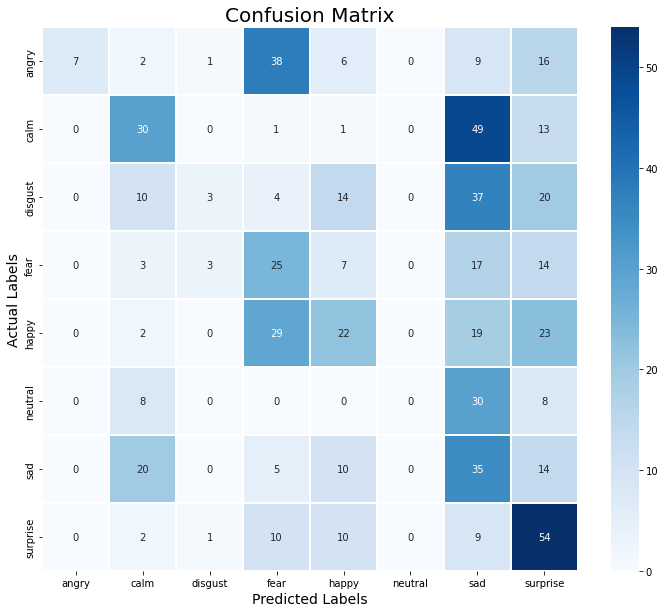

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.58      0.62      0.60       236
        calm       0.46      0.89      0.61       142
     disgust       0.30      0.45      0.36       240
        fear       0.47      0.11      0.17       238
       happy       0.30      0.37      0.33       232
     neutral       0.18      0.10      0.12       136
         sad       0.37      0.21      0.27       226
    surprise       0.50      0.60      0.55       146

    accuracy                           0.40      1596
   macro avg       0.40      0.42      0.38      1596
weighted avg       0.40      0.40      0.37      1596

